In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import loompy as lpy
import seaborn as sns
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
np.random.seed(8)


# chick

In [2]:
## chick

chick = sc.read_h5ad("../chick/adata_chick_7S_10S_13S_raw_24Jan.h5ad")
cells = pd.read_csv("../chick/adata_chick_adata_chick_filtered_combined_from_alone_v2_cells_obs.csv")
cells.index = cells['Unnamed: 0']
chick = chick[chick.obs.index.isin(cells.index)]
chick.obs = chick.obs.join(cells['clusters_final'])
chick.obs.loc[ chick.obs.clusters_final=='Endoderm', 'clusters_final'] = 'Endo'
chick = chick[chick.obs.clusters_final.isin(['PXM','PS','NMps','PreNeural','Neural','FP','Notochord','Endo','LPM'])]
sc.pp.calculate_qc_metrics(chick, percent_top=None, log1p=False, inplace=True)
chick.obs['cell_type'] = chick.obs.clusters_final
chick.obs['species']='chick'
print(chick)


pd.DataFrame(np.unique(list(chick.obs['clusters_final']), return_counts=True))


/camp/home/ritot/.local/lib/python3.8/site-packages/scanpy/preprocessing/_qc.py:133: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[obs_metrics.columns] = obs_metrics


AnnData object with n_obs × n_vars = 13066 × 21424
    obs: 'CB', 'leiden', 'clusters', 'sample', 'clusters_final', 'n_genes_by_counts', 'total_counts', 'cell_type', 'species'
    var: 'gene_names', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'ambiguous', 'spliced', 'unspliced'


,0,1,2,3,4,5,6,7,8
0,Endo,FP,LPM,NMps,Neural,Notochord,PS,PXM,PreNeural
1,503,130,2466,1515,880,879,2701,2524,1468


In [3]:
genes = pd.read_csv("../chick/adata_chick_filtered_combined_from_alone_v2_HVG_genes.csv")
genes = list(genes.gene_names)
len(genes)

1486

# mouse

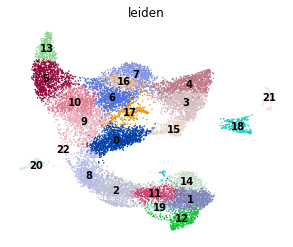

In [4]:
## mouse
adata = sc.read('/camp/lab/briscoej/home/users/ritot/single_cell/chan_data/adata_chan_plusNotoEndo_n2.h5ad')
plt.rcParams['figure.figsize'] = 4, 3
sc.tl.leiden(adata,resolution=1.5, seed=42,key_added='leiden')
plt.rcParams['figure.figsize'] = 5, 4

sc.pl.umap(adata, color='leiden',frameon=False,legend_loc='on data')

leiden_to_new = {
    '8': 'NMps',
    '2': 'PreNeural',
    '1': 'Neural',
    '11': 'Neural',
    '14': 'FP',
    '18':'Endo',
    '20':'Notochord',
    '22': 'LPM',
    '0': 'PXM',
    '15': 'PXM',
    '3': 'PXM',
    '9': 'LPM',
    '10': 'LPM'}


adata.obs['cell_type'] = (
     adata.obs['leiden']
     .map(leiden_to_new)
     .astype('category')
)


In [5]:
clusters_final_colors = {
'Neural':'#3387b5', 
'PXM':'#984ea3',
'LPM':'#BD0959',
'Notochord':'#a65628',
'Endo':'#f2991a',
'PreNeural':'#72daf2', 
'NMps':'#92F5D3',
'FP': '#503287',
}


adata.obs['cell_type'] = adata.obs['cell_type'].cat.reorder_categories(clusters_final_colors.keys())

adata.obs['clusters_final_colors'] = (
     adata.obs['cell_type']
     .map(clusters_final_colors)
     .astype('category')
)


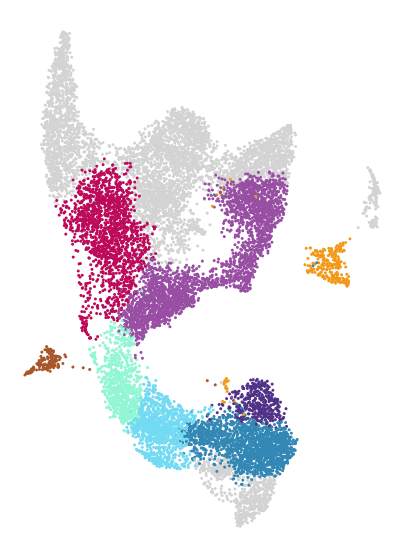

In [6]:
plt.rcParams['figure.figsize'] = 7, 10
sc.pl.umap(adata,color='cell_type', add_outline=False, legend_loc='none',
           palette=list(clusters_final_colors.values()),size=35,
           legend_fontsize=10, legend_fontoutline=2,title='',frameon=False,components='1,2')


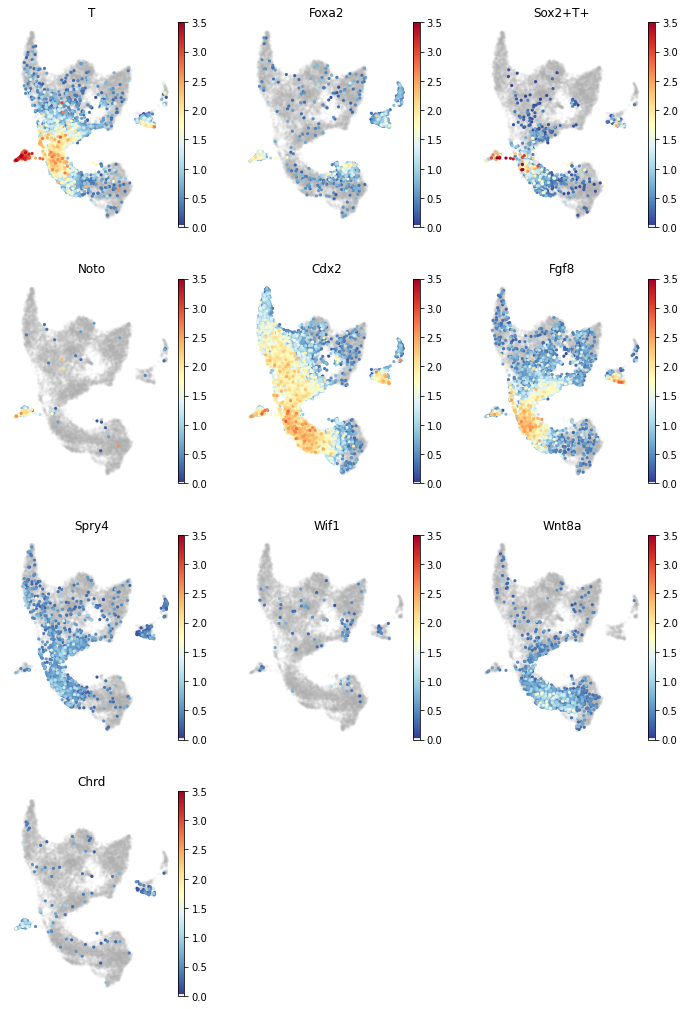

In [7]:
adata.obs["Sox2+T+"] = np.squeeze(np.asarray(adata.raw[:,'{}'.format("Sox2")].X.todense()))*np.squeeze(np.asarray(adata.raw[:,'{}'.format("T")].X.todense()))


viridis = cm.get_cmap('RdYlBu_r', 256)
newcolors = viridis(np.linspace(0, 1, 256))
pink = np.array([170/256, 170/256, 170/256, 0.1])
newcolors[:3, :] = pink
newcmp = ListedColormap(newcolors)

plt.rcParams['figure.figsize'] = 3,4
sc.pl.umap(adata,
                 color=[
           'T','Foxa2',"Sox2+T+",'Noto','Cdx2','Fgf8','Spry4','Wif1','Wnt8a','Chrd'],
           add_outline=False, legend_loc='on data',ncols=3,
                 cmap=newcmp,
           legend_fontsize=10, legend_fontoutline=2,frameon=False,size=40,vmin=0,vmax=3.5)

In [8]:
mouse = sc.read_h5ad('../macaque/mouse_to_compare.h5ad')
mouse = mouse[ mouse.obs.index.isin(adata.obs.index)]

df_ = mouse.obs.join(adata.obs[['leiden','cell_type']], how='inner')
df_

mouse.obs = df_

mouse.obs['species']='mouse'
mouse

AnnData object with n_obs × n_vars = 13857 × 26360
    obs: 'CB', 'n_genes_by_counts', 'pct_counts_mt', 'sample', 'total_counts', 'total_counts_mt', 'leiden', 'cell_type', 'species'
    var: 'gene_names', 'mean_counts', 'mt', 'n_cells_by_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

# macaque

In [9]:
## macaque

adata = sc.read_h5ad('./../macaque/Caudal_macaque_data_v2.h5ad')

adata.obs['cell_type_OG']=adata.obs['cell_type']

leiden_to_new = {
    '20': 'NMps',
    '11': 'PreNeural',
    '16': 'PreNeural',
    '22': 'Neural','18': 'Neural',
    '2': 'Neural','13': 'Neural',
    '24': 'Neural','5': 'Neural',
    '6': 'Neural','3': 'Neural','19': 'Neural','15': 'Neural','21': 'Neural',
    '0': 'FP',
    '17':'Endo',
    '25':'Notochord',
    '12': 'PS',
    '14': 'PXM', '4': 'PXM','1': 'PXM', '7': 'PXM','9': 'PXM', '26': 'PXM',
    '8': 'LPM', '23': 'LPM',
    '10': 'PXM'}


adata.obs['cell_type'] = (
     adata.obs['leiden_1.5']
     .map(leiden_to_new)
     .astype('category')
)


macaque = sc.read_h5ad('../macaque/macaque_data_raw.h5ad')
macaque = macaque[ macaque.obs.index.isin(adata.obs.index)]

df_ = macaque.obs.join(adata.obs, how='inner')
df_

macaque.obs = df_


macaque.obs['species']='macaque'


sc.pp.calculate_qc_metrics(macaque, percent_top=None, log1p=False, inplace=True)

macaque


AnnData object with n_obs × n_vars = 5251 × 36057
    obs: 'bc', 'doublet', 'doublet_score', 'stage', 'sample', 'theiler_stage', 'cell_cluster', 'cell_type', 'color', 'UMAP_1', 'UMAP_2', 'sample_id', 'n_genes_by_counts', 'total_counts', 'leiden_1', 'SOX2+T+', 'leiden_1.5', 'leiden_2', 'cell_type_OG', 'species'
    var: 'gene_ids', 'feature_types', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

## human embryo CS7

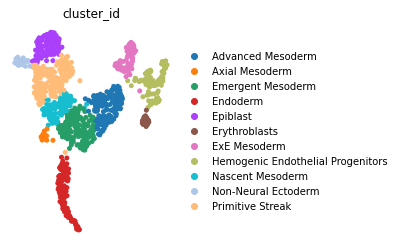

AnnData object with n_obs × n_vars = 1195 × 57490
    obs: 'X0', 'X1', 'cluster_id', 'sub_cluster', 'cell_name', 'species', 'cell_type'
    var: 'gene_names'
    uns: 'cluster_id_colors'
    obsm: 'X_umap'

In [10]:
adata = sc.read('../human_embryo_data/Tyser CS7/tiago_CS7_counts.mtx', cache=True)
metadata = pd.read_csv('../human_embryo_data/Tyser CS7/tiago_CS7_metadata.csv', index_col=0)
metadata.index =  metadata.cell_name

metadata_genes = pd.read_csv('../human_embryo_data/Tyser CS7/tiago_CS7_metadata_genes.csv', index_col=0)

adata.var['gene_names'] = list(metadata_genes.index)
adata.var.index = adata.var['gene_names']

adata.obs = metadata

umap_data = {
    'UMAP_1': list(adata.obs.X0),
    'UMAP_2': list(adata.obs.X1)
}

umap_df = pd.DataFrame.from_dict(umap_data, orient='columns')
umap_df.index = metadata.cell_name
adata.obsm['X_umap'] = umap_df
sc.pl.umap(adata, color='cluster_id',frameon=False)

adata.obs['species']='human_CS7'
adata.obs['cell_type']=adata.obs['cluster_id']

adata.index = adata.var.gene_names


humanCS7 = adata
humanCS7



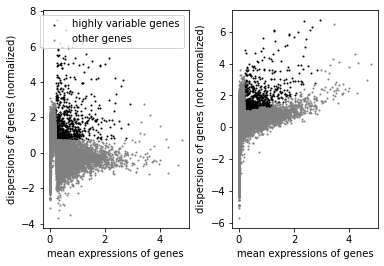

In [11]:
#call HVG as usual
adata2=adata.copy()

sc.pp.normalize_total(adata2, target_sum=1e4, exclude_highly_expressed=True, max_fraction=0.03)
sc.pp.log1p(adata2)

# #variable genes for the full dataset
sc.pp.highly_variable_genes(adata2, min_mean=0.2, max_mean=3, min_disp=0.75)
sc.pl.highly_variable_genes(adata2)

#  # # print("Highly variable genes: %d"%sum(adata.var.highly_variable))
var_genes = adata2.var.highly_variable
var_genes_human= var_genes.index[var_genes==True]

In [12]:
adata.var = adata.var.reset_index(drop=True)
humanCS7.obs['SOX2+TBXT+']=np.squeeze(np.asarray(adata.X[:, adata.var.index[adata.var.gene_names == 'TBXT'].tolist() ].todense())*np.asarray(adata.X[:, adata.var.index[adata.var.gene_names == 'SOX2'].tolist() ].todense()))
humanCS7.var.index =humanCS7.var.gene_names

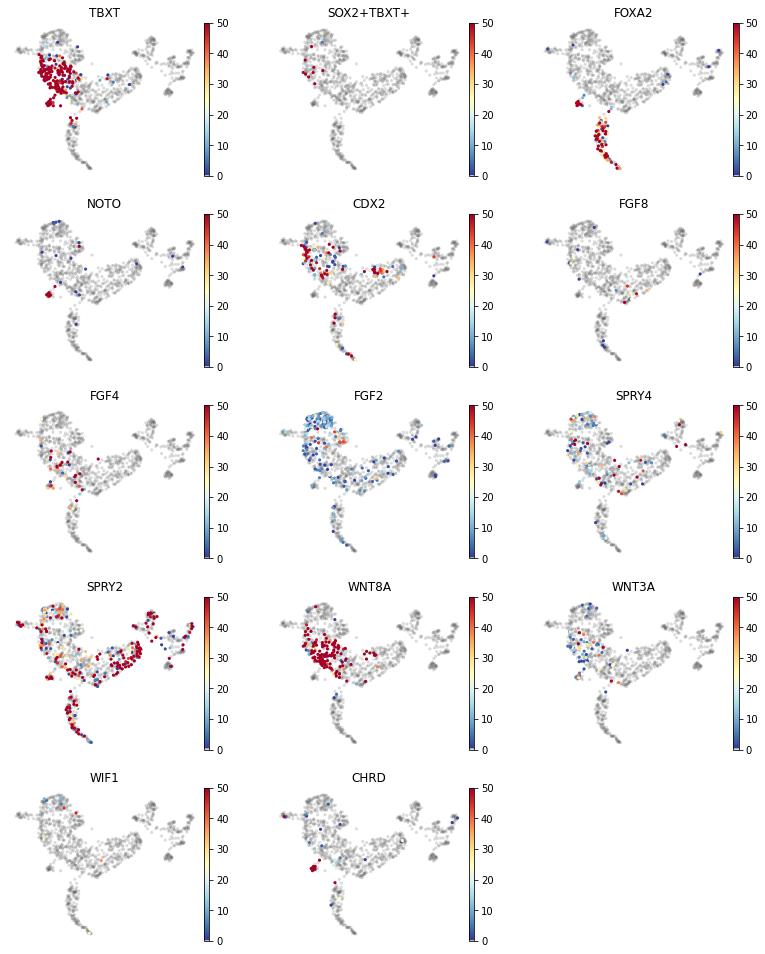

In [13]:
viridis = cm.get_cmap('RdYlBu_r', 256)
newcolors = viridis(np.linspace(0, 1, 256))
pink = np.array([80/256, 80/256, 80/256, 0.2])
newcolors[:3, :] = pink
newcmp = ListedColormap(newcolors)


plt.rcParams['figure.figsize'] = 3.5, 3

sc.pl.umap(humanCS7,
                 color=['TBXT','SOX2+TBXT+','FOXA2','NOTO','CDX2','FGF8','FGF4','FGF2','SPRY4','SPRY2','WNT8A','WNT3A','WIF1','CHRD'],
           add_outline=False, legend_loc='on data',ncols=3,
                 cmap=newcmp,
           legend_fontsize=10, legend_fontoutline=2,frameon=False,size=40,vmin=0,vmax=50)


# human neuruloid (2D micropatterns)

In [14]:
## human neuruloid
adata = sc.read_h5ad('./../micropatterns/micropatterns_day3_noRA_leidein_celltypes_n3.h5ad')

adata.obs['treatment'] = ['ctr' if x=='0' else 'D24h' if x=='1' else 'D48h' for x in adata.obs['sample']]
adata.obs.index = ["{}_{}".format(b_, a_) for a_, b_ in zip(list(adata.obs.index), list(adata.obs['treatment']))]
adata.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,doublet,doublet_score,sample,S_score,G2M_score,phase,leiden_1,leiden,cell_type,leiden_.7,cell_type_2,leiden_.5,Mix2,clusters_final_colors,treatment
ctr_AAACCCAAGTGGAAAG-1,5331,5331,29928.0,2698.0,9.014969,False,0.022260,0,0.050075,0.731644,G2M,1,0,Notochord,0,PreNeural,0,0.404288,#72daf2,ctr
ctr_AAACGAAAGACGCCCT-1,3505,3505,16923.0,1817.0,10.736867,False,0.023303,0,0.052563,0.188279,G2M,7,4,NMPs,7,PreNeural,4,0.000000,#72daf2,ctr
ctr_AAACGAACACACTTAG-1,6455,6455,39010.0,2837.0,7.272495,False,0.057490,0,0.063936,0.784853,G2M,1,0,Notochord,0,PreNeural,0,0.000000,#72daf2,ctr
ctr_AAACGAAGTCATCCGG-1,3389,3389,12569.0,959.0,7.629883,False,0.023303,0,-0.060934,0.277382,G2M,7,4,NMPs,7,PreNeural,4,1.086050,#72daf2,ctr
ctr_AAACGCTAGAGCATAT-1,3574,3574,13754.0,1764.0,12.825359,False,0.020332,0,0.041750,0.152592,G2M,10,4,NMPs,8,Neural,4,0.000000,#3387b5,ctr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D48h_TTTGGAGAGGCATCTT-1,6036,6036,33391.0,3079.0,9.221048,False,0.037937,2,-0.111828,0.867086,G2M,4,2,LPM,4,LPM,2,0.000000,#BD0959,D48h
D48h_TTTGGAGTCCAATCCC-1,4066,4066,13686.0,1067.0,7.796288,False,0.011843,2,-0.229057,-0.234736,G1,3,5,Endo,3,Endo,5,0.000000,#f2991a,D48h
D48h_TTTGGTTAGGGCAGGA-1,4580,4580,20703.0,694.0,3.352171,False,0.026067,2,0.412969,0.093126,S,4,2,LPM,4,LPM,2,0.000000,#BD0959,D48h
D48h_TTTGGTTGTAGACTGG-1,5224,5224,23915.0,2085.0,8.718377,False,0.031264,2,-0.139392,0.592102,G2M,2,1,PS/PXM,1,PXM,1,0.000000,#984ea3,D48h


In [15]:


hadata1 = sc.read_h5ad("../micropatterns/S1_ctr.h5ad")
hadata1.obs.index = ["ctr_"+a_ for a_ in list(hadata1.obs.index)]

hadata2 = sc.read_h5ad("../micropatterns/S2_delay.h5ad")
hadata2.obs.index = ["D24h_"+a_ for a_ in list(hadata2.obs.index)]

hadata3 = sc.read_h5ad("../micropatterns/S3_delay2.h5ad")
hadata3.obs.index = ["D48h_"+a_ for a_ in list(hadata3.obs.index)]

neuruloid = hadata1.concatenate(hadata2,hadata3, index_unique=None, batch_key='sample')
neuruloid.obs['treatment'] = ['ctr' if x=='0' else '24h' if x=='1' else '48h' for x in neuruloid.obs['sample']]
#neuruloid.obs.index = ["{}_{}".format(b_, a_) for a_, b_ in zip(list(neuruloid.obs.index), list(neuruloid.obs['treatment']))]
neuruloid.obs['species']='human_neuruloid'
#neuruloid.obs_names_make_unique()

test=[]
for x in neuruloid.obs.index:
    if np.sum(adata.obs.index==x)==1:
        test.append(adata.obs.iloc[adata.obs.index==x]['cell_type_2'][0])
    else:
        test.append( np.nan)

neuruloid.obs['cell_type'] = test

neuruloid.obs


/camp/home/ritot/home/users/ritot/single_cell/env1/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,doublet,doublet_score,sample,treatment,species,cell_type
ctr_AAACCCAAGTGGAAAG-1,5331,5331,29928.0,2698.0,9.014969,False,0.022260,0,ctr,human_neuruloid,PreNeural
ctr_AAACGAAAGACGCCCT-1,3505,3505,16923.0,1817.0,10.736867,False,0.023303,0,ctr,human_neuruloid,PreNeural
ctr_AAACGAACACACTTAG-1,6455,6455,39010.0,2837.0,7.272495,False,0.057490,0,ctr,human_neuruloid,PreNeural
ctr_AAACGAAGTCATCCGG-1,3389,3389,12569.0,959.0,7.629883,False,0.023303,0,ctr,human_neuruloid,PreNeural
ctr_AAACGCTAGAGCATAT-1,3574,3574,13754.0,1764.0,12.825359,False,0.020332,0,ctr,human_neuruloid,Neural
...,...,...,...,...,...,...,...,...,...,...,...
D48h_TTTGGAGAGGCATCTT-1,6036,6036,33391.0,3079.0,9.221048,False,0.037937,2,48h,human_neuruloid,LPM
D48h_TTTGGAGTCCAATCCC-1,4066,4066,13686.0,1067.0,7.796288,False,0.011843,2,48h,human_neuruloid,Endo
D48h_TTTGGTTAGGGCAGGA-1,4580,4580,20703.0,694.0,3.352171,False,0.026067,2,48h,human_neuruloid,LPM
D48h_TTTGGTTGTAGACTGG-1,5224,5224,23915.0,2085.0,8.718377,False,0.031264,2,48h,human_neuruloid,PXM


In [16]:
sc.pp.calculate_qc_metrics(neuruloid, percent_top=None, log1p=False, inplace=True)


## human notoroid (3D)

In [17]:
adata = sc.read_h5ad("../notoroids/notoroids_day7_noharmony_15pca_nocellcyclereg.h5ad")
adata

AnnData object with n_obs × n_vars = 30938 × 1481
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet', 'doublet_score', 'sample', 'S_score', 'G2M_score', 'phase', 'Day', 'Delay'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'n_cells_by_counts-2', 'mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'n_cells_by_counts-3', 'mean_counts-3', 'pct_dropout_by_counts-3', 'total_counts-3', 'n_cells_by_counts-4', 'mean_counts-4', 'pct_dropout_by_counts-4', 'total_counts-4', 'n_cells_by_counts-5', 'mean_counts-5', 'pct_dropout_by_counts-5', 'total_counts-5', 'n_cells_by_counts-6', 'mean_counts-6', 'pct_dropout_by_counts-6', 'total_counts-6', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Day_colors', 'Delay_colors', 'draw_graph', 'h

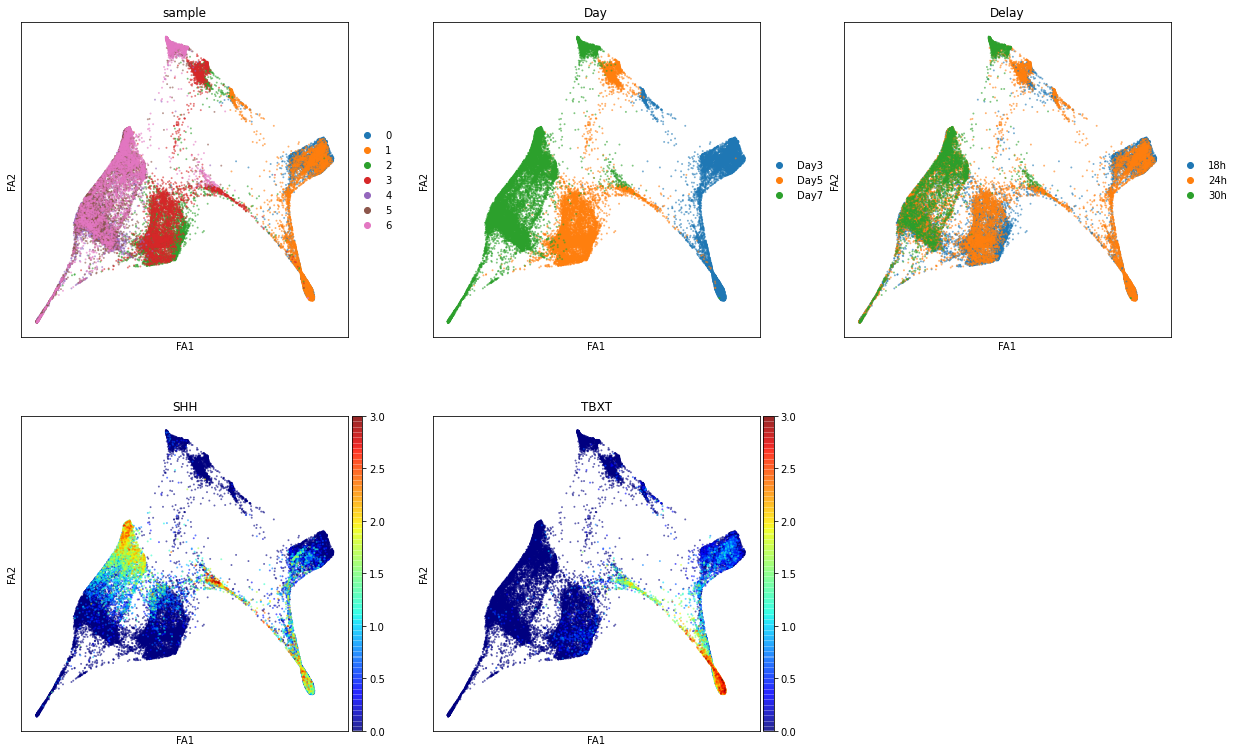

In [18]:
plt.rcParams['figure.figsize'] = 6, 6
sc.pl.draw_graph(adata, color=['sample','Day','Delay','SHH','TBXT'],ncols=3,
               alpha=0.6, color_map='jet',vmin=0,vmax=3,use_raw=True,size=15)#, save='_notoroids_day7_maingenes.pdf')

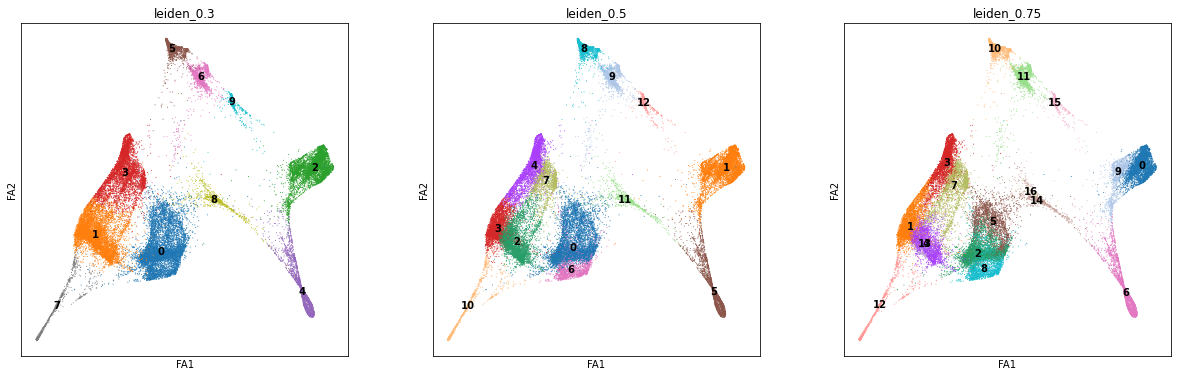

In [19]:
sc.pp.neighbors(adata, n_pcs=40, key_added='hood_40')

sc.tl.leiden(adata,resolution=0.75 ,random_state=9,key_added='leiden_0.75',neighbors_key='hood_40')
sc.tl.leiden(adata,resolution=0.5 ,random_state=9,key_added='leiden_0.5',neighbors_key='hood_40')
sc.tl.leiden(adata,resolution=0.3 ,random_state=9,key_added='leiden_0.3',neighbors_key='hood_40')

sc.pl.draw_graph(adata,
                 color=['leiden_0.3','leiden_0.5','leiden_0.75'],
                 legend_loc='on data')

In [20]:

leiden_to_new = {
    '0': 'PreNeural',
    '1': 'Prog. Day3',
    '2': 'pMN',
    '3': 'pMN',
    '4': 'FP',
    '5':'early Notochord/ Node',
    '6':'PreNeural/ Neural Prog.',
'7':'FP',
'8':'PXM/ Scleratome',
'9':'PXM',
'10':'MNs',
'11':'Notochord',
'12':'PS/PXM'}


adata.obs['cell_type'] = (
     adata.obs['leiden_0.5']
     .map(leiden_to_new)
     .astype('category')
)


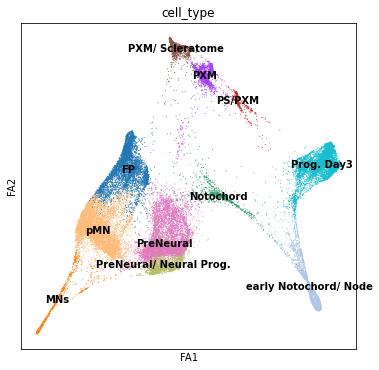

In [21]:
sc.pl.draw_graph(adata,
                 color=['cell_type'],
                 legend_loc='on data')

In [22]:
notoroid_meta=adata.obs

In [23]:
adata1 = sc.read_h5ad("../notoroids/S1_D3_18h.h5ad")
adata2 = sc.read_h5ad("../notoroids/S2_D3_24h.h5ad")
adata3 = sc.read_h5ad("../notoroids/S3_D5_18h.h5ad")
adata4 = sc.read_h5ad("../notoroids/S4_D5_24h.h5ad")
adata5 = sc.read_h5ad("../notoroids/S5_D7_18h.h5ad")
adata6 = sc.read_h5ad("../notoroids/S6_D7_24h.h5ad")
adata7 = sc.read_h5ad("../notoroids/S7_D7_30h.h5ad")


adata = adata1.concatenate(adata2,adata3, adata4, adata5, adata6, adata7, index_unique=None, batch_key='sample')

adata.obs_names_make_unique()

/camp/home/ritot/home/users/ritot/single_cell/env1/lib/python3.8/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/camp/home/ritot/home/users/ritot/single_cell/env1/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [24]:
adata.obs= notoroid_meta

notoroid=adata
notoroid.obs['species']='human_notoroid'
notoroid

AnnData object with n_obs × n_vars = 30938 × 33538
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet', 'doublet_score', 'sample', 'S_score', 'G2M_score', 'phase', 'Day', 'Delay', 'leiden_0.75', 'leiden_0.5', 'leiden_0.3', 'cell_type', 'species'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'n_cells_by_counts-2', 'mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'n_cells_by_counts-3', 'mean_counts-3', 'pct_dropout_by_counts-3', 'total_counts-3', 'n_cells_by_counts-4', 'mean_counts-4', 'pct_dropout_by_counts-4', 'total_counts-4', 'n_cells_by_counts-5', 'mean_counts-5', 'pct_dropout_by_counts-5', 'total_counts-5', 'n_cells_by_counts-6', 'mean_counts-6', 'pct_dropout_by_counts-6', 'total_counts-6'

## Gene matches across species

In [25]:
genematch = pd.read_csv('../macaque/human_mouse_chick_macaque_genematch.csv')
genematch

,Unnamed: 0,human_genes,mouse_genes,mouse_read,mouse_inhuman,chick_genes,chick_read,chick_inhuman,mouse_CAPSON,macaque_genes,macaque_inchick,macaque_inhuman,macaque_inmouse
0,0,A1CF,A1cf,True,True,A1CF,True,True,A1CF,A1CF,NaN,NaN,NaN
1,1,A4GALT,A4galt,True,True,A4GALT,True,True,A4GALT,A4GALT,NaN,NaN,NaN
2,2,A4GNT,A4gnt,True,True,A4GNT,True,True,A4GNT,A4GNT,NaN,NaN,NaN
3,4,AACS,Aacs,True,True,AACS,True,True,AACS,AACS,NaN,NaN,NaN
4,5,AADAC,Aadac,True,True,AADAC,True,True,AADAC,AADAC,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8860,11827,ZSWIM7,Zswim7,True,True,ZSWIM7,True,True,ZSWIM7,ZSWIM7,NaN,NaN,NaN
8861,11828,ZSWIM8,Zswim8,True,True,ZSWIM8,True,True,ZSWIM8,ZSWIM8,NaN,NaN,NaN
8862,11830,ZW10,Zw10,True,True,ZW10,True,True,ZW10,ZW10,NaN,NaN,NaN
8863,11832,ZYG11A,Zyg11a,True,True,ZYG11A,True,True,ZYG11A,ZYG11A,NaN,NaN,NaN


In [26]:
chick = chick[:, list(genematch['chick_genes'])]
chick.var['chick_names'] = list(genematch['chick_genes'])
chick.var['human_names'] = list(genematch['human_genes'])
chick.var.index = chick.var['human_names']
chick.var

<ipython-input-26-1ff175d6a7f8>:2: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  chick.var['chick_names'] = list(genematch['chick_genes'])


,gene_names,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,chick_names,human_names
human_names,,,,,,,
A1CF,A1CF,4,0.000306,99.969386,4.0,A1CF,A1CF
A4GALT,A4GALT,54,0.004209,99.586714,55.0,A4GALT,A4GALT
A4GNT,A4GNT,0,0.000000,100.000000,0.0,A4GNT,A4GNT
AACS,AACS,1303,0.112200,90.027552,1466.0,AACS,AACS
AADAC,AADAC,4,0.000306,99.969386,4.0,AADAC,AADAC
...,...,...,...,...,...,...,...
ZSWIM7,ZSWIM7,4742,0.476963,63.707332,6232.0,ZSWIM7,ZSWIM7
ZSWIM8,ZSWIM8,589,0.047145,95.492117,616.0,ZSWIM8,ZSWIM8
ZW10,ZW10,897,0.072555,93.134854,948.0,ZW10,ZW10


In [27]:
mouse = mouse[:, list(genematch['mouse_genes'])]
mouse.var['mouse_names'] = list(genematch['mouse_genes'])
mouse.var['human_names'] = list(genematch['human_genes'])
mouse.var.index = mouse.var['human_names']
mouse.var

<ipython-input-27-567926d50cb1>:2: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  mouse.var['mouse_names'] = list(genematch['mouse_genes'])


,gene_names,mean_counts,mt,n_cells_by_counts,pct_dropout_by_counts,total_counts,mouse_names,human_names
human_names,,,,,,,,
A1CF,A1cf,0.001208,0,188,99.881764,192.0,A1cf,A1CF
A4GALT,A4galt,0.006597,0,949,99.403160,1049.0,A4galt,A4GALT
A4GNT,A4gnt,0.000013,0,2,99.998742,2.0,A4gnt,A4GNT
AACS,Aacs,0.046106,0,6425,95.959221,7331.0,Aacs,AACS
AADAC,Aadac,0.003912,0,535,99.663530,622.0,Aadac,AADAC
...,...,...,...,...,...,...,...,...
ZSWIM7,Zswim7,0.094991,0,12566,92.097054,15104.0,Zswim7,ZSWIM7
ZSWIM8,Zswim8,0.091281,0,11602,92.703328,14514.0,Zswim8,ZSWIM8
ZW10,Zw10,0.110236,0,14654,90.783880,17528.0,Zw10,ZW10


In [28]:
macaque = macaque[:, list(genematch['macaque_genes'])]
macaque.var['macaque_names'] = list(genematch['macaque_genes'])
macaque.var['human_names'] = list(genematch['human_genes'])
macaque.var.index = macaque.var['human_names'] 
macaque.var

<ipython-input-28-7e1791433cca>:2: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  macaque.var['macaque_names'] = list(genematch['macaque_genes'])
/camp/home/ritot/home/users/ritot/single_cell/env1/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


,gene_ids,feature_types,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,macaque_names,human_names
human_names,,,,,,,,
A1CF,A1CF,Gene Expression,3,0.000571,99.942868,3.0,A1CF,A1CF
A4GALT,A4GALT,Gene Expression,21,0.004380,99.600076,23.0,A4GALT,A4GALT
A4GNT,A4GNT,Gene Expression,1,0.000190,99.980956,1.0,A4GNT,A4GNT
AACS,AACS,Gene Expression,1229,0.286803,76.594934,1506.0,AACS,AACS
AADAC,AADAC,Gene Expression,0,0.000000,100.000000,0.0,AADAC,AADAC
...,...,...,...,...,...,...,...,...
ZSWIM7,ZSWIM7,Gene Expression,1858,0.483527,64.616264,2539.0,ZSWIM7,ZSWIM7
ZSWIM8,ZSWIM8,Gene Expression,430,0.087983,91.811084,462.0,ZSWIM8,ZSWIM8
ZW10,ZW10,Gene Expression,495,0.102076,90.573224,536.0,ZW10,ZW10


In [29]:
neuruloid = neuruloid[:, list(genematch['human_genes'])]
neuruloid.var

,gene_ids,feature_types,mt,n_cells_by_counts-0,mean_counts-0,pct_dropout_by_counts-0,total_counts-0,n_cells_by_counts-1,mean_counts-1,pct_dropout_by_counts-1,total_counts-1,n_cells_by_counts-2,mean_counts-2,pct_dropout_by_counts-2,total_counts-2,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
A1CF,ENSG00000148584,Gene Expression,False,1,0.000239,99.976094,1.0,0,0.000000,100.000000,0.0,2,0.000737,99.926254,2.0,2,0.000257,99.974333,2.0
A4GALT,ENSG00000128274,Gene Expression,False,193,0.047334,95.386087,198.0,76,0.032609,96.940419,81.0,44,0.016224,98.377581,44.0,294,0.038886,96.226899,303.0
A4GNT,ENSG00000118017,Gene Expression,False,0,0.000000,100.000000,0.0,0,0.000000,100.000000,0.0,1,0.000369,99.963127,1.0,1,0.000128,99.987166,1.0
AACS,ENSG00000081760,Gene Expression,False,1049,0.309586,74.922305,1295.0,769,0.399356,69.041868,992.0,707,0.328909,73.930678,892.0,2333,0.372690,70.059035,2904.0
AADAC,ENSG00000114771,Gene Expression,False,0,0.000000,100.000000,0.0,1,0.000403,99.959742,1.0,0,0.000000,100.000000,0.0,0,0.000000,100.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZSWIM7,ENSG00000214941,Gene Expression,False,2395,0.980158,42.744442,4100.0,1694,1.358293,31.803543,3374.0,1756,1.215708,35.250737,3297.0,5363,1.261422,31.172998,9829.0
ZSWIM8,ENSG00000214655,Gene Expression,False,386,0.098494,90.772173,412.0,503,0.243156,79.750403,604.0,523,0.226401,80.715339,614.0,1285,0.190067,83.508727,1481.0
ZW10,ENSG00000086827,Gene Expression,False,965,0.284724,76.930433,1191.0,672,0.358293,72.946860,890.0,720,0.339970,73.451327,922.0,2156,0.348691,72.330595,2717.0
ZYG11A,ENSG00000203995,Gene Expression,False,21,0.005020,99.497968,21.0,21,0.008454,99.154589,21.0,30,0.011062,98.893805,30.0,65,0.008342,99.165811,65.0


In [30]:
notoroid = notoroid[:, list(genematch['human_genes'])]
notoroid.var

,gene_ids,feature_types,mt,n_cells_by_counts-0,mean_counts-0,pct_dropout_by_counts-0,total_counts-0,n_cells_by_counts-1,mean_counts-1,pct_dropout_by_counts-1,...,pct_dropout_by_counts-4,total_counts-4,n_cells_by_counts-5,mean_counts-5,pct_dropout_by_counts-5,total_counts-5,n_cells_by_counts-6,mean_counts-6,pct_dropout_by_counts-6,total_counts-6
A1CF,ENSG00000148584,Gene Expression,False,0,0.000000,100.000000,0.0,2,0.000413,99.958678,...,99.900299,5.0,7,0.001162,99.883837,7.0,2,0.000367,99.963350,2.0
A4GALT,ENSG00000128274,Gene Expression,False,402,0.102125,90.815627,447.0,280,0.063430,94.214876,...,99.361914,33.0,44,0.007302,99.269831,44.0,39,0.007513,99.285322,41.0
A4GNT,ENSG00000118017,Gene Expression,False,0,0.000000,100.000000,0.0,0,0.000000,100.000000,...,99.960120,2.0,0,0.000000,100.000000,0.0,0,0.000000,100.000000,0.0
AACS,ENSG00000081760,Gene Expression,False,1452,0.446424,66.826594,1954.0,1362,0.363017,71.859504,...,83.748754,940.0,892,0.168603,85.197478,1016.0,866,0.179952,84.130475,982.0
AADAC,ENSG00000114771,Gene Expression,False,0,0.000000,100.000000,0.0,1,0.000207,99.979339,...,100.000000,0.0,3,0.000498,99.950216,3.0,3,0.000550,99.945025,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZSWIM7,ENSG00000214941,Gene Expression,False,3160,1.686772,27.804432,7383.0,3229,1.432438,33.285124,...,44.785643,4587.0,3466,0.974610,42.482576,5873.0,3201,0.992670,41.341396,5417.0
ZSWIM8,ENSG00000214655,Gene Expression,False,779,0.211332,82.202422,925.0,930,0.228926,80.785124,...,89.990030,541.0,635,0.114338,89.462330,689.0,711,0.144951,86.970863,791.0
ZW10,ENSG00000086827,Gene Expression,False,1435,0.431346,67.214987,1888.0,1221,0.317149,74.772727,...,81.674975,1098.0,1079,0.207766,82.094258,1252.0,1107,0.239875,79.714129,1309.0
ZYG11A,ENSG00000203995,Gene Expression,False,28,0.006397,99.360292,28.0,44,0.009091,99.090909,...,99.740778,13.0,12,0.002157,99.800863,13.0,13,0.002382,99.761774,13.0


In [31]:
genes_to_subset = list(genematch['human_genes']) # Replace with your gene list
missing_genes = [gene for gene in genes_to_subset if gene not in humanCS7.var_names]

humanCS7 = humanCS7[:, [x for x in list(genematch['human_genes']) if x not in missing_genes]]
humanCS7.var

,gene_names
gene_names,
A1CF,A1CF
A4GALT,A4GALT
A4GNT,A4GNT
AACS,AACS
AADAC,AADAC
...,...
ZSWIM7,ZSWIM7
ZSWIM8,ZSWIM8
ZW10,ZW10


In [33]:
# get HVG intersection to subset matrices above

HVG_chick = pd.read_csv('../chick/adata_chick_GENE_CHECK_HVG.csv')
HVG_chick = HVG_chick['0']
HVG_chick

HVG_withTranslation = list(HVG_chick[[ x in list(genematch.chick_genes) for x in HVG_chick]])
HVG_chick_humanized = [genematch['human_genes'][ genematch.chick_genes == x ].values[0] for x in HVG_withTranslation]


_ = sc.read_h5ad('../chan_data/adata_chan_plusNotoEndo_n2.h5ad')
HVG_mouse= _.var.index
HVG_withTranslation = list(HVG_mouse[[ x in list(genematch.mouse_genes) for x in HVG_mouse]])
HVG_mouse_humanized = [genematch['human_genes'][ genematch.mouse_genes == x ].values[0] for x in HVG_withTranslation]



_ = sc.read_h5ad('../micropatterns/Just_day3-noRA.h5ad')
HVG_human= _.var.index
HVG_withTranslation = list(HVG_human[[ x in list(genematch.human_genes) for x in HVG_human]])
HVG_human_humanized = [genematch['human_genes'][ genematch.human_genes == x ].values[0] for x in HVG_withTranslation]



_ = sc.read_h5ad('../macaque/macaque_data_processed.h5ad')
HVG_macaque= _.var.index
HVG_withTranslation = list(HVG_macaque[[ x in list(genematch.macaque_genes) for x in HVG_macaque]])
HVG_macaque_humanized = [genematch['human_genes'][ genematch.macaque_genes == x ].values[0] for x in HVG_withTranslation]



_= sc.read_h5ad("../notoroids/notoroids_day7_noharmony_15pca_nocellcyclereg.h5ad")
HVG_notoroid= _.var.index
HVG_withTranslation = list(HVG_notoroid[[ x in list(genematch.human_genes) for x in HVG_notoroid]])
HVG_notoroid_humanized = [genematch['human_genes'][ genematch.human_genes == x ].values[0] for x in HVG_withTranslation]


HVG_CS7=var_genes_human
HVG_withTranslation = list(HVG_CS7[[ x in list(genematch.human_genes) for x in HVG_CS7]])
HVG_CS7_humanized = [genematch['human_genes'][ genematch.human_genes == x ].values[0] for x in HVG_withTranslation]



HVG_combined = HVG_macaque_humanized +  HVG_human_humanized  + HVG_mouse_humanized  + HVG_chick_humanized + HVG_CS7_humanized + HVG_notoroid_humanized 



def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

HVG_intersect = intersection(HVG_macaque_humanized,HVG_human_humanized) # + HVG_mouse_humanized  + HVG_chick_humanized

HVG_intersect = intersection(HVG_intersect,HVG_mouse_humanized) # + HVG_mouse_humanized  + HVG_chick_humanized
HVG_intersect = intersection(HVG_intersect,HVG_chick_humanized)


HVG_combined = np.unique(HVG_combined)
HVG_intersect = np.unique(HVG_intersect)

print(len(np.unique(HVG_combined)))
print(len(np.unique(HVG_intersect)))



3026
166


In [34]:
#df= pd.DataFrame(HVG_combined)
#df.to_csv("./adata_interspecies_classifier_HVG_combined.csv")

# Random Forest: train classifier

In [35]:
adata = chick.concatenate(mouse, macaque, neuruloid, notoroid, humanCS7)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

_ = [x for x in HVG_intersect if x in adata.var.index]
adata = adata[:, _]
adata

/camp/home/ritot/home/users/ritot/single_cell/env1/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


View of AnnData object with n_obs × n_vars = 72099 × 166
    obs: 'CB', 'leiden', 'clusters', 'sample', 'clusters_final', 'n_genes_by_counts', 'total_counts', 'cell_type', 'species', 'pct_counts_mt', 'total_counts_mt', 'bc', 'doublet', 'doublet_score', 'stage', 'theiler_stage', 'cell_cluster', 'color', 'UMAP_1', 'UMAP_2', 'sample_id', 'leiden_1', 'SOX2+T+', 'leiden_1.5', 'leiden_2', 'cell_type_OG', 'n_genes', 'treatment', 'S_score', 'G2M_score', 'phase', 'Day', 'Delay', 'leiden_0.75', 'leiden_0.5', 'leiden_0.3', 'X0', 'X1', 'cluster_id', 'sub_cluster', 'cell_name', 'SOX2+TBXT+', 'batch'
    var: 'gene_names-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'chick_names-0', 'human_names-0', 'gene_names-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'human_names-1', 'mt-1', 'mouse_names-1', 'n_cells_by_counts-2', 'mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'human_names-2', 'gene_ids-2', 'fe

In [36]:
condition_key = 'species'
train_conditions = ['mouse','chick']

train_adata = adata[adata.obs[condition_key].isin(train_conditions)]
train_adata = train_adata[train_adata.obs.cell_type.isin(['PXM','NMps','PreNeural','Neural','FP','Notochord','Endo','LPM'])]

In [37]:
pd.DataFrame(np.transpose(np.unique(train_adata.obs.cell_type, return_counts=True)))


,0,1
0,Endo,754
1,FP,527
2,LPM,4075
3,NMps,2307
4,Neural,2504
5,Notochord,1020
6,PXM,5111
7,PreNeural,2524


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier


X = train_adata[:, train_adata.var.index ].to_df()


In [39]:
X = train_adata[:, train_adata.var.index ].to_df()
print(X.shape)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit( train_adata.obs.cell_type )
print(le.classes_)

y = le.transform(train_adata.obs.cell_type)

print(len(y))


(18822, 166)
['Endo' 'FP' 'LPM' 'NMps' 'Neural' 'Notochord' 'PXM' 'PreNeural']
18822


In [40]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12, stratify=y)


In [41]:
X_train

,ACTA2,ACTC1,ADAMTS1,ALDH1A2,ANXA2,ATF3,BAMBI,BARX1,BMP2,BMP4,...,TNNC1,TNNI1,TOP2A,TWIST1,UBE2C,UNC5C,VEGFA,WFDC2,WNT3A,WNT5A
7S_GTGAGTTTCAGCGCAC-0,0.0,0.0,0.000000,0.0,0.000000,1.725004,0.000000,0.0,0.000000,0.000000,...,2.324845,0.0,1.725004,0.0,1.725004,0.0,0.0,0.0,0.0,0.000000
13S_CTCCCAACAGGGACTA-0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,1.883616,0.0,2.331698,0.0,1.883616,0.0,0.0,0.0,0.0,2.132547
10S_GTGTCCTTCCCTCATG-0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,2.231611,0.0,1.878432,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
10S_CGTTCTGTCTAGACCA-0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,1.587407,0.0,2.539486,0.0,2.172716,0.0,0.0,0.0,0.0,0.000000
13S_GCCATGGAGTGCACTT-0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,2.490563,0.0,0.000000,0.0,0.0,0.0,0.0,1.877025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10S_TTGCCTGAGTAAGACT-0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.132243,0.000000,...,2.241818,0.0,1.649661,0.0,0.000000,0.0,0.0,0.0,0.0,1.988945
7S_GACTCTCAGAGTCAAT-0,0.0,0.0,0.000000,0.0,1.171299,0.000000,0.000000,0.0,1.171299,0.000000,...,1.171299,0.0,2.808394,0.0,1.171299,0.0,0.0,0.0,0.0,1.171299
TAGAGCTTCTGTACGA-data_e85b-1,0.0,0.0,0.816879,0.0,0.000000,0.000000,0.816879,0.0,0.000000,1.260404,...,0.000000,0.0,1.990217,0.0,1.566587,0.0,0.0,0.0,0.0,0.816879
GCGGGTTTCCACGAAT-data_e80a-1,0.0,0.0,0.000000,0.0,0.000000,1.147133,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,1.667386,0.0,2.007872,0.0,0.0,0.0,0.0,0.000000


In [42]:
le.classes_

array(['Endo', 'FP', 'LPM', 'NMps', 'Neural', 'Notochord', 'PXM',
       'PreNeural'], dtype=object)

In [43]:
clf = RandomForestClassifier(n_estimators=5000, verbose=True, random_state=0)
clf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:  4.9min finished


RandomForestClassifier(n_estimators=5000, random_state=0, verbose=True)

<BarContainer object of 49 artists>

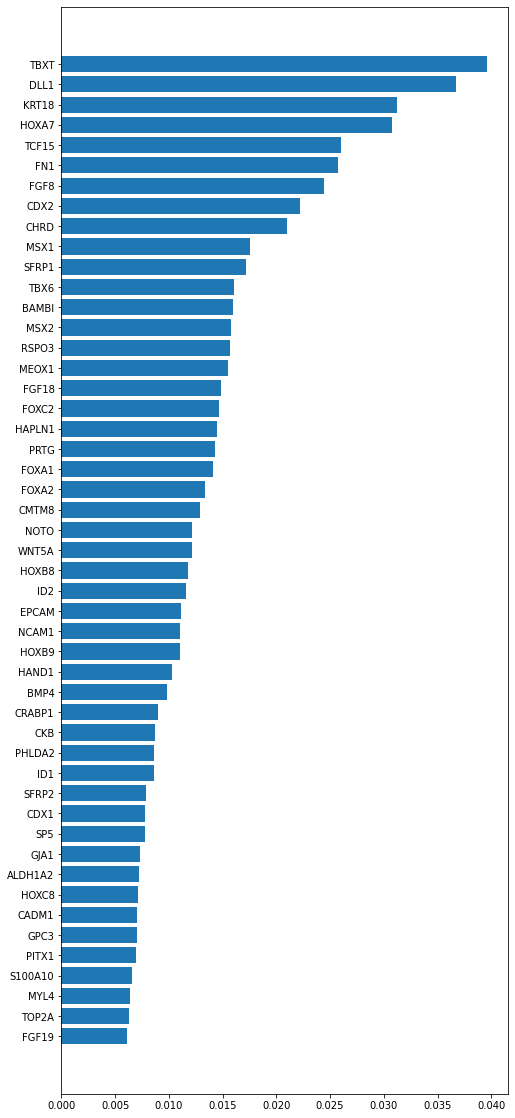

In [44]:
features_idx = clf.feature_importances_.argsort()[::-1]

plt.rcParams['figure.figsize'] = 8, 20
plt.barh(np.asarray(train_adata.var.index)[ features_idx ][1:50][::-1], 
         clf.feature_importances_[ features_idx ][1:50][::-1])

In [45]:
y_pred_test = clf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:    5.8s finished


In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score(y_test, y_pred_test)

0.8856778580535487

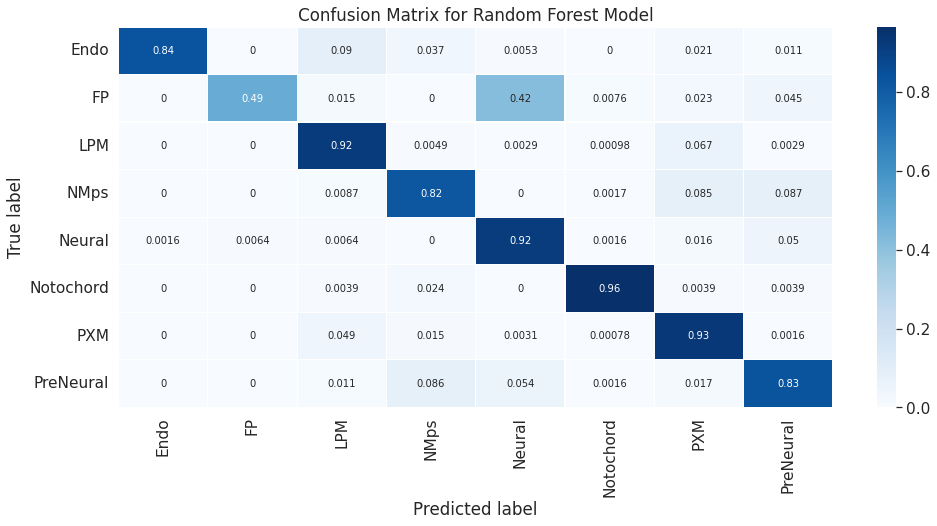

In [47]:
import seaborn as sns

matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Blues, linewidths=0.2)

# Add labels to the plot
class_names = le.classes_
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks2, class_names, rotation=90)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

# Prediction of targets

In [48]:
target_conditions = ['macaque','human_CS7','human_neuruloid', 'human_notoroid']
print(target_conditions)

label_col = 'cell_type'

['macaque', 'human_CS7', 'human_neuruloid', 'human_notoroid']


In [49]:
target_adata = adata[adata.obs[condition_key].isin(target_conditions)]
print(target_adata)


View of AnnData object with n_obs × n_vars = 45176 × 166
    obs: 'CB', 'leiden', 'clusters', 'sample', 'clusters_final', 'n_genes_by_counts', 'total_counts', 'cell_type', 'species', 'pct_counts_mt', 'total_counts_mt', 'bc', 'doublet', 'doublet_score', 'stage', 'theiler_stage', 'cell_cluster', 'color', 'UMAP_1', 'UMAP_2', 'sample_id', 'leiden_1', 'SOX2+T+', 'leiden_1.5', 'leiden_2', 'cell_type_OG', 'n_genes', 'treatment', 'S_score', 'G2M_score', 'phase', 'Day', 'Delay', 'leiden_0.75', 'leiden_0.5', 'leiden_0.3', 'X0', 'X1', 'cluster_id', 'sub_cluster', 'cell_name', 'SOX2+TBXT+', 'batch'
    var: 'gene_names-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'chick_names-0', 'human_names-0', 'gene_names-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'human_names-1', 'mt-1', 'mouse_names-1', 'n_cells_by_counts-2', 'mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'human_names-2', 'gene_ids-2', 'fe

In [50]:
target_adata.obs['cell_type'] = ["{}_{}".format(b_, a_) for a_, b_ in zip(list(target_adata.obs[label_col]), list(target_adata.obs['species']))]


# delete cell types that RF was not trained on like motor neurons or Erythroblasts
target_adata = target_adata[ ~target_adata.obs.cell_type.isin(['human_CS7_Erythroblasts',
                                                               'human_CS7_Hemogenic Endothelial Progenitors',
                                                               'human_neuruloid_nan',
                                                               'human_notoroid_pMN',
                                                              'human_notoroid_MNs',
                                                              'human_CS7_ExE Mesoderm',
                                                              'human_CS7_Emergent Mesoderm',
                                                              'human_CS7_Non-Neural Ectoderm',
                                                              'human_CS7_Epiblast',
                                                              'human_CS7_Primitive Streak',
                                                              'human_notoroid_Prog. Day3', 
                                                               'human_notoroid_Axial Prog. Day3',
                                                               'macaque_PS',
                                                              ])]


target_types = pd.DataFrame(np.transpose(np.unique(target_adata.obs.cell_type, return_counts=True)))
target_types


<ipython-input-50-9487e4b0059e>:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  target_adata.obs['cell_type'] = ["{}_{}".format(b_, a_) for a_, b_ in zip(list(target_adata.obs[label_col]), list(target_adata.obs['species']))]


,0,1
0,human_CS7_Advanced Mesoderm,164
1,human_CS7_Axial Mesoderm,23
2,human_CS7_Endoderm,135
3,human_CS7_Nascent Mesoderm,98
4,human_neuruloid_Endo,711
5,human_neuruloid_LPM,1283
6,human_neuruloid_NMps,191
7,human_neuruloid_Neural,479
8,human_neuruloid_Notochord,503
9,human_neuruloid_PXM,1729


In [51]:
X_target = target_adata[:, target_adata.var.index ].to_df()

In [52]:
X_target

,ACTA2,ACTC1,ADAMTS1,ALDH1A2,ANXA2,ATF3,BAMBI,BARX1,BMP2,BMP4,...,TNNC1,TNNI1,TOP2A,TWIST1,UBE2C,UNC5C,VEGFA,WFDC2,WNT3A,WNT5A
AAACCCAAGTGATAGT-5-2,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,...,0.000000,0.000000,2.467779,0.000000,1.308077,0.0,0.000000,0.000000,0.0,0.000000
AAACCCACATCGATCA-5-2,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,...,0.000000,0.000000,1.113497,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
AAACCCATCAGTAGGG-5-2,0.0,1.956354,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,...,1.395439,0.000000,2.784006,0.000000,2.313548,0.0,0.000000,0.000000,0.0,0.000000
AAACGAAAGAAACTAC-5-2,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,...,0.000000,1.270912,2.941736,1.270912,2.941736,0.0,0.000000,1.270912,0.0,0.000000
AAACGAACACAGCCTG-5-2,0.0,0.000000,0.0,0.000000,1.533645,0.0,0.000000,0.0,0.000000,0.00000,...,0.000000,0.000000,1.533645,0.000000,2.476969,0.0,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SS.sc7785702-5,0.0,0.000000,0.0,1.082717,3.368771,0.0,0.000000,0.0,0.000000,0.00000,...,0.000000,0.000000,2.188212,0.000000,3.714308,0.0,0.000000,0.856980,0.0,0.000000
SS.sc7785357-5,0.0,0.000000,0.0,0.000000,3.826840,0.0,1.944332,0.0,0.000000,0.00000,...,0.144002,0.000000,0.709306,0.000000,0.050340,0.0,0.734389,0.000000,0.0,0.000000
SS.sc7786714-5,0.0,0.000000,0.0,0.000000,3.415657,0.0,3.428717,0.0,0.000000,0.00000,...,1.833962,0.000000,1.364844,0.000000,2.253048,0.0,0.910730,1.019544,0.0,0.000000
SS.sc7785318-5,0.0,0.047235,0.0,0.000000,2.526670,0.0,0.000000,0.0,0.770502,2.02527,...,0.000000,0.000000,1.155810,0.000000,2.340222,0.0,0.047235,0.000000,0.0,0.000000


In [53]:
y_pred_test = clf.predict(X_target)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:   30.0s finished


In [54]:
print(y_pred_test[1:5])
len(y_pred_test)
max(y_pred_test)

[4 4 6 1]


7

In [55]:
y_pred_proba_test = clf.predict_proba(X_target)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:   28.9s finished


In [56]:
def output_pred_class(y_pred_proba):
    pred_class = [ list(x).index(max(x)) if max(x)>0.2 else max(y_pred_test)+1 for x in y_pred_proba] #should be number after num_cats
    return pred_class

y_pred_test = output_pred_class(y_pred_proba_test)

In [57]:
y_test = list(target_adata.obs.cell_type)
print(len(y_test))

y_test = y_test 
print(len(y_test))


values, keys = pd.factorize(target_types[0])
dic = dict(zip(keys, values))

y_test_numbers = [dic.get(x) for x in y_test]
dic


31244
31244


{'human_CS7_Advanced Mesoderm': 0,
 'human_CS7_Axial Mesoderm': 1,
 'human_CS7_Endoderm': 2,
 'human_CS7_Nascent Mesoderm': 3,
 'human_neuruloid_Endo': 4,
 'human_neuruloid_LPM': 5,
 'human_neuruloid_NMps': 6,
 'human_neuruloid_Neural': 7,
 'human_neuruloid_Notochord': 8,
 'human_neuruloid_PXM': 9,
 'human_neuruloid_PreNeural': 10,
 'human_notoroid_FP': 11,
 'human_notoroid_Notochord': 12,
 'human_notoroid_PS/PXM': 13,
 'human_notoroid_PXM': 14,
 'human_notoroid_PXM/ Scleratome': 15,
 'human_notoroid_PreNeural': 16,
 'human_notoroid_PreNeural/ Neural Prog.': 17,
 'human_notoroid_early Notochord/ Node': 18,
 'macaque_Endo': 19,
 'macaque_FP': 20,
 'macaque_LPM': 21,
 'macaque_NMps': 22,
 'macaque_Neural': 23,
 'macaque_Notochord': 24,
 'macaque_PXM': 25,
 'macaque_PreNeural': 26}

In [58]:
print(len(y_test))
print(len(y_pred_test))
print(len(class_names))
print(len(np.unique(y_pred_test)))
print(len(dic.keys()))

31244
31244
8
9
27


In [59]:
_ = np.zeros([len(class_names)+1,len(dic.keys())])

print(_.shape)
conf_matrix = pd.DataFrame(_, columns=dic.keys(), index=np.append(class_names,"Low score"))

for x,y in zip(y_pred_test,y_test):
    conf_matrix.iloc[x].at[y] = conf_matrix.iloc[x].at[y] +1
    

(9, 27)


Text(0.5, 1.0, 'Confusion Matrix for Random Forest Model')

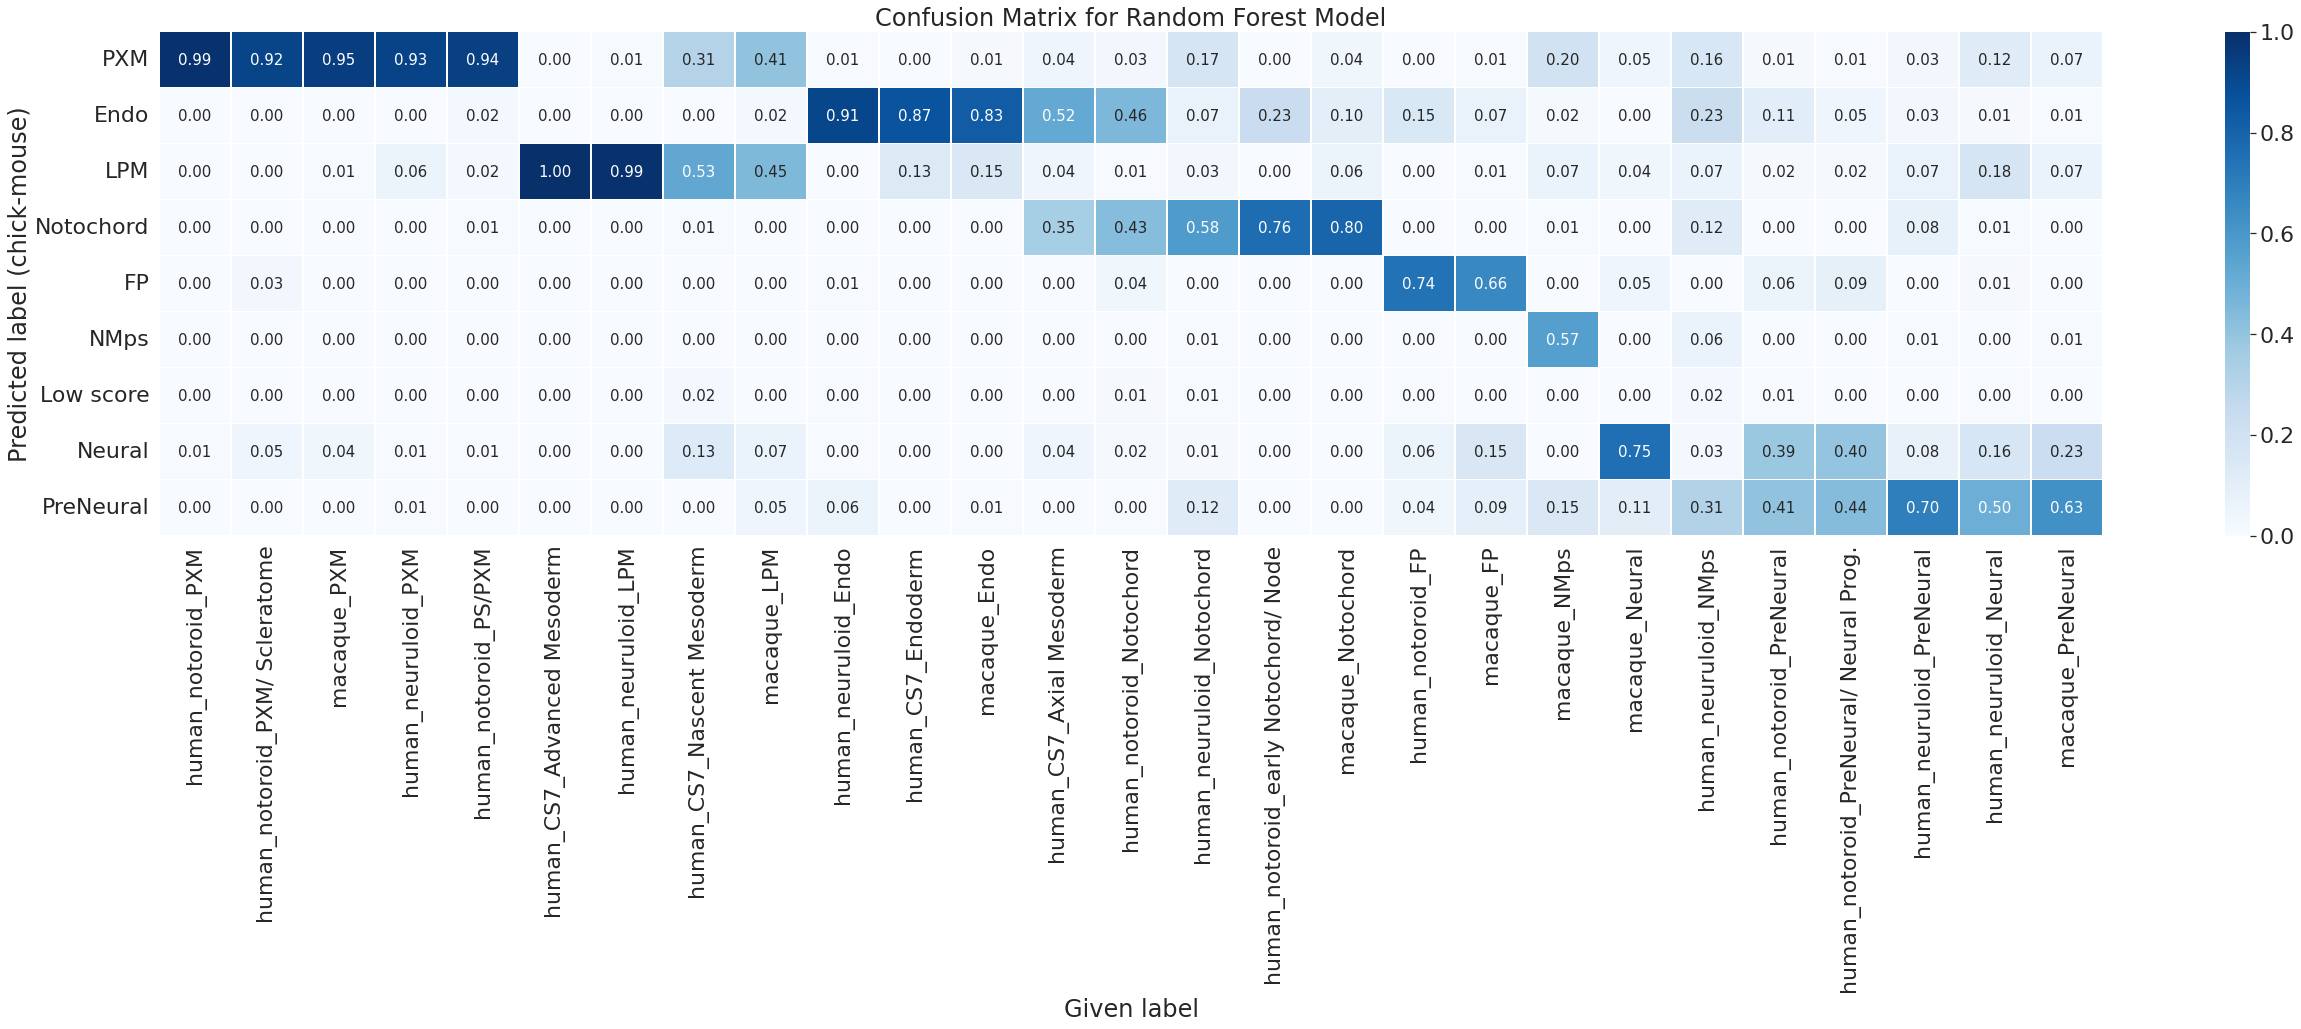

In [60]:
df = conf_matrix.div(conf_matrix.sum(axis=0), axis=1)


from scipy.cluster.hierarchy import linkage, dendrogram
# HC for rows
row_linkage = linkage(df, method='average', metric='euclidean')
row_order = dendrogram(row_linkage, no_plot=True)['leaves']

# HC for columns
col_linkage = linkage(df.T, method='average', metric='euclidean')
col_order = dendrogram(col_linkage, no_plot=True)['leaves']

df = df.iloc[row_order, col_order]

plt.figure(figsize=(45,35))
sns.set(font_scale=2)

sns.heatmap(df, annot=True, annot_kws={'size':15},fmt='.2f',
            cmap=plt.cm.Blues, linewidths=0.2)


plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.subplots_adjust(left=0.15, right=0.9, top=0.9, bottom=0.7) 
plt.ylabel('Predicted label (chick-mouse)')
plt.xlabel('Given label')
plt.title('Confusion Matrix for Random Forest Model')
#plt.savefig('./heatmap_withCS7.pdf', format='pdf', dpi=300)



In [61]:
#final plot with cell types rearranged for display reasons

cols = conf_matrix.columns.tolist()
print(len(cols))

27


In [62]:


new_cols= ['macaque_Endo','macaque_LPM','macaque_PXM','macaque_Notochord','macaque_NMps','macaque_PreNeural','macaque_Neural','macaque_FP',
           'human_CS7_Endoderm','human_CS7_Advanced Mesoderm','human_CS7_Nascent Mesoderm','human_CS7_Axial Mesoderm',
    'human_neuruloid_Endo','human_neuruloid_LPM','human_neuruloid_PXM','human_neuruloid_Notochord','human_neuruloid_NMps','human_neuruloid_PreNeural','human_neuruloid_Neural',
       'human_notoroid_PS/PXM', 'human_notoroid_PXM','human_notoroid_PXM/ Scleratome', 'human_notoroid_early Notochord/ Node', 'human_notoroid_Notochord',  'human_notoroid_PreNeural', 'human_notoroid_FP']

df = conf_matrix.div(conf_matrix.sum(axis=0), axis=1)[new_cols]


new_rows=['Endo', 'LPM','PXM', 'Notochord', 'NMps','PreNeural','Neural','FP','Low score']
df = df.reindex(new_rows)

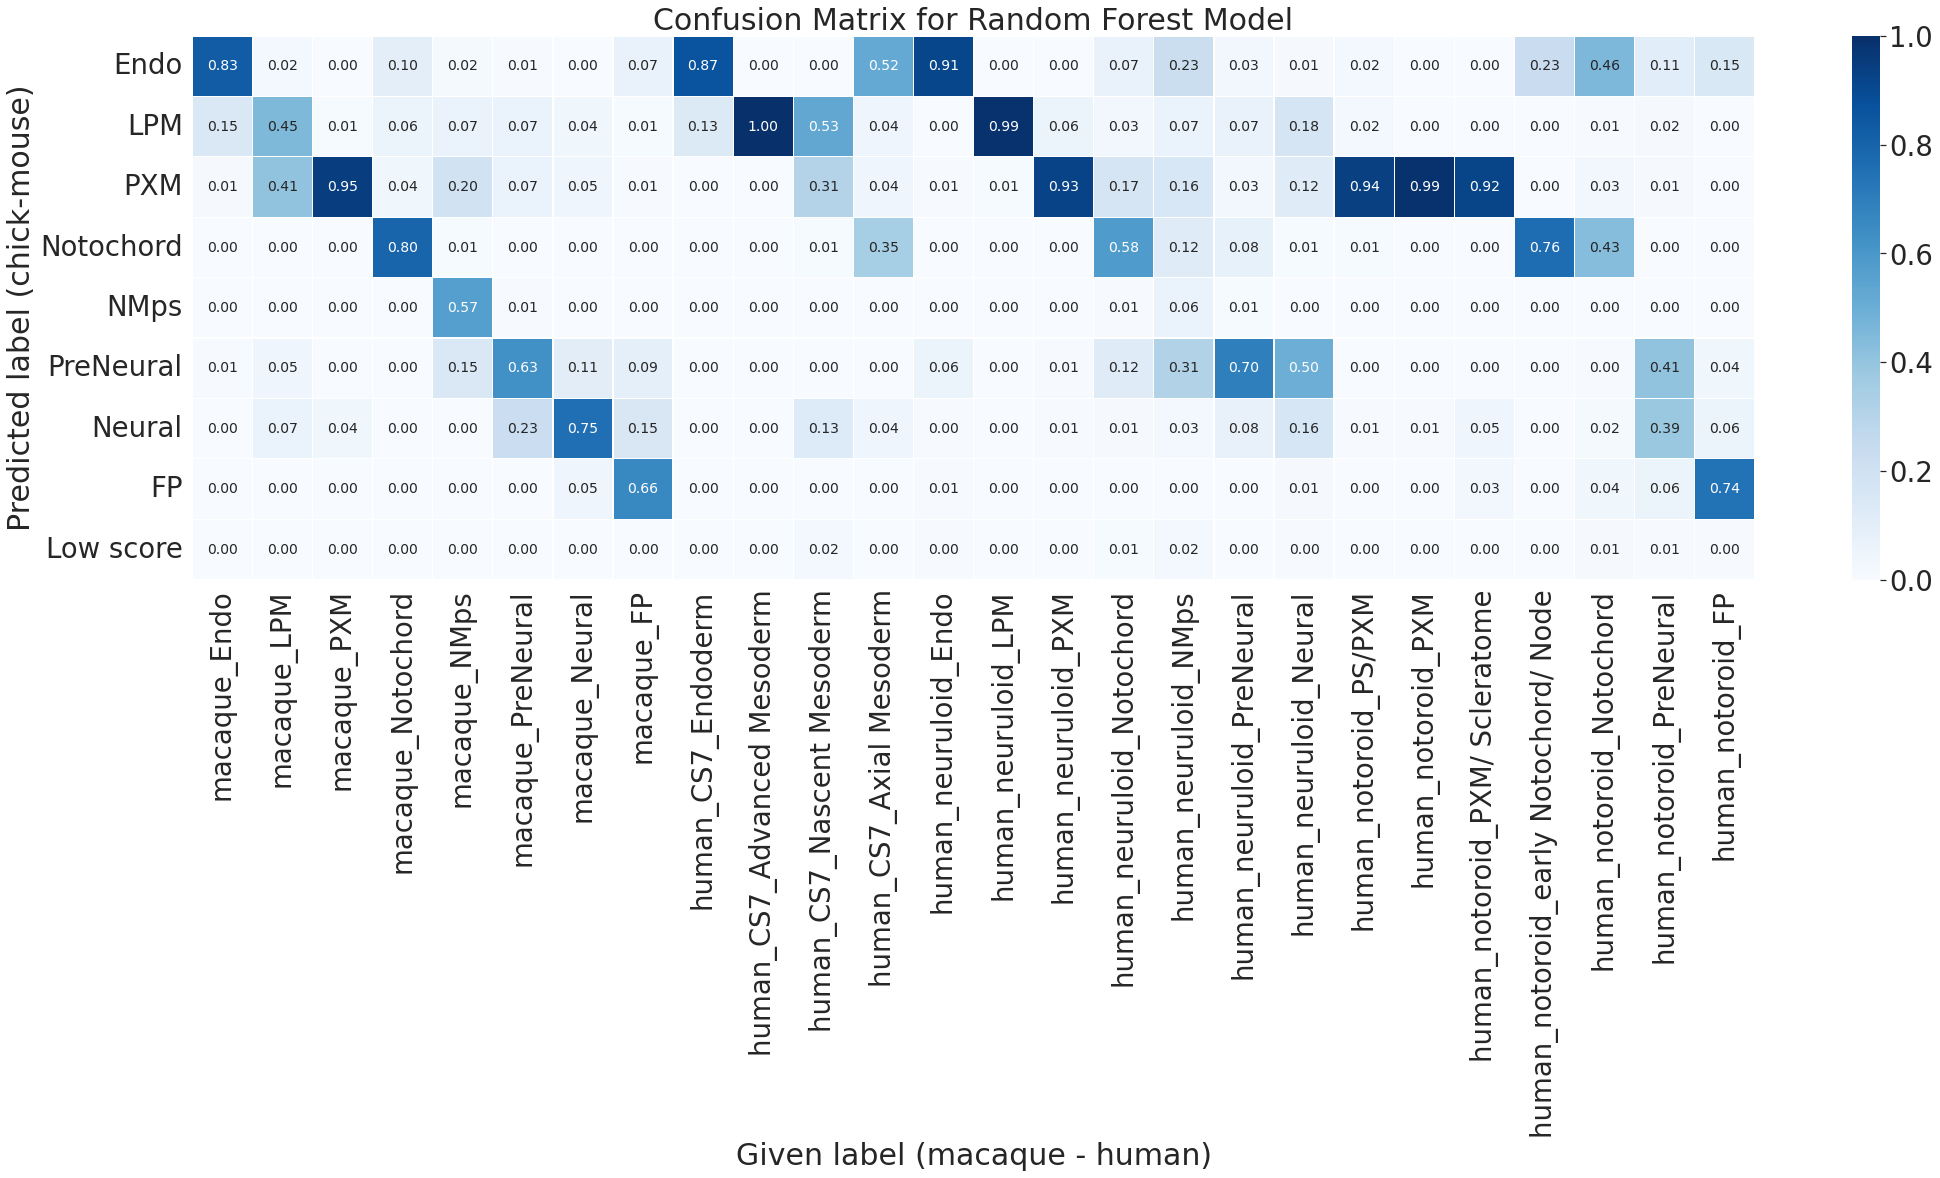

In [65]:
plt.figure(figsize=(35,10))
sns.set(font_scale=2.5)
sns.heatmap(df, annot=True, annot_kws={'size':14},fmt='.2f',   #'weight': 'bold'
            cmap=plt.cm.Blues, linewidths=0.3)

plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.ylabel('Predicted label (chick-mouse)')
plt.xlabel('Given label (macaque - human)')
plt.title('Confusion Matrix for Random Forest Model')

#plt.savefig('./heatmap_withCS7_final_lowscore0.2_V3.pdf', format='pdf', dpi=300)